In [1]:
import os
import sys
 
# 1. 确定pkg_rootdir，即根据%pwd或os.getcwd()的结果截取出工程目录pkg_rootdir。
cur_dir = os.getcwd()
pkg_rootdir = os.path.dirname(cur_dir)  # *注意改为项目自定义包的根路径
# print(pkg_rootdir)
if pkg_rootdir not in sys.path:  # 解决ipynb引用上层路径中的模块时的ModuleNotFoundError问题
    sys.path.append(pkg_rootdir)
    print('-- Add root directory "{}" to system path.'.format(pkg_rootdir))
# 2. 在shell中启动jupyter服务：
print("For localhost developers:\nPlease start a jupyter servive with the bash command: jupyter notebook --allow-root --notebook-dir={pkg_rootdir}".format(pkg_rootdir=pkg_rootdir.replace("\\", "/")))
# 3. 切换kernel为jupyter notebook:
# 可在开发环境中切换kernel，或者直接在jupyter notebook上开发。
# 4. 推荐模板
# 推荐模板只需在使用python开发的自定义pkg最外层目录下的__init__.py中加入一次即可。如在示例中的D:/github_data/__init__py中加入一次即可。
# 推荐模板在[这里](https://blog.csdn.net/bird_fly_i/article/details/117739729)的文末。

-- Add root directory "/home/node/notebook" to system path.
For localhost developers:
Please start a jupyter servive with the bash command: jupyter notebook --allow-root --notebook-dir=/home/node/notebook


In [2]:
# %pip list --format=freeze > ../python_v2/requirements.txt
%pip install -r ../python_v2/requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
from python_v2.open_digger import openDigger

-- Add root directory "/home/node/notebook/python_v2" to system path.


In [4]:
year = 2022
startMonth = 1
endMonth = 12
baseOptions = {
    "startYear": year, 
    "endYear": year,
    "startMonth": startMonth, 
    "endMonth": endMonth,
    "groupTimeRange": 'year',
    "order": 'DESC'
}

# 2022中国开源年度报告

## OpenRank 指标介绍

OpenRank 指标是由 X-lab 实验室研发的，基于开源开发者-项目协作关系构建的协作网络下的网络指标。OpenRank 不仅能够很好的表征项目的整体发展状态、社区参与度，同时也引入了开源生态的要素，在开源生态中出于协作关键位置的项目也可以被很好的识别出来。

在今年的报告中，除以 OpenRank 为主要排行指标外，我们依然会给出项目对应的活跃度指标、各项事件的详细统计数据以及支持的 CHAOSS 指标等。

In [5]:
import pandas as pd

In [6]:
def processOpenrankData(options, **kwargs):
    baseOptions = kwargs.get("baseOptions", {})
    chaoss = openDigger.metric.chaoss
    options_temp = {}
    options_temp.update(options)
    options_temp.update(baseOptions)
    options = options_temp
    openrank = openDigger.index.openrank.getRepoOpenrank(options)  # done!
    print(pd.DataFrame(list(openrank)))
    # -------------------------todo---------------------------#
    if not options.get("labelIntersect", None):
        options["repoIds"] = list(map(lambda d: d.get("id"), openrank))
    options["limit"] = -1; # remove limit for other queries
    # activity, stars, participants, newContributors, forks, busFactor, issueResponseTime, issueResolutionDuration = tuple([
    activity, newContributors, forks, busFactor, issueResponseTime, issueResolutionDuration = tuple([
        openDigger.index.activity.getRepoActivity(options),
        # openDigger.metric.xlab.repoStars(options),
        # openDigger.metric.xlab.repoParticipants(options),
        chaoss.newContributors(options),
        chaoss.technicalFork(options),
        chaoss.busFactor(options),
        chaoss.issueResponseTime(options),
        chaoss.issueResolutionDuration(options),
    ])
    def getData(arr, id, key):
        try:
            df_arr = pd.DataFrame(arr)
            df_arr_id_matched = df_arr[df_arr.id == id]
            return df_arr_id_matched[key][0] if len(df_arr_id_matched) else '-'
        except Exception as e:
            print(e.message, id, key)
    def map_func(d):
        id = d.id
        r = {
            "name": d.name,
            "openrank": d.openrank[0],
            "activity": getData(activity, id, 'activity'),
            # "stars": int(getData(stars, id, 'count')),
            "forks": int(getData(forks, id, 'count')),
            # "participants": int(getData(participants, id, 'count')),
            "new_contri": int(getData(newContributors, id, 'new_contributors')),
            "bus_factor": int(getData(busFactor, id, 'bus_factor')),
            "issue_resol_dur": getData(issueResolutionDuration, id, 'avg'),
            "issue_resp_time": getData(issueResponseTime, id, 'levels'),
        }
        r = Dict(r)
        if r.issue_resol_dur != '-':
            r.issue_resol_dur += ' days'
        if isinstance(r.issue_resp_time, list):
            r.issue_resp_time = r.issue_resp_time.join(',')
        return r
    result = list(map(map_func, openrank))
    result = pd.DataFrame(result)
    print(result)

In [7]:
processOpenrankData({ "limit": 10 }, baseOptions=baseOptions)

          id platform                      name    openrank
0    4542716   GitHub             NixOS/nixpkgs  [18117.29]
1   12888993   GitHub       home-assistant/core  [14211.12]
2   41881900   GitHub          microsoft/vscode  [12252.52]
3   72685026   GitHub  MicrosoftDocs/azure-docs  [11407.06]
4   31792824   GitHub           flutter/flutter  [10039.78]
5   65600975   GitHub           pytorch/pytorch   [8077.24]
6  210716005   GitHub            dotnet/runtime   [8009.43]
7    7833168   GitHub            elastic/kibana   [7879.73]
8   15634981   GitHub         godotengine/godot   [7555.25]
9     724712   GitHub            rust-lang/rust   [7264.76]


NameError: name 'Index' is not defined

## 全球项目 OpenRank 排名 Top 10 数据分析

此处给出 2022 年度全球项目 OpenRank 指标前 10 名的详细数据。

In [ ]:
processOpenrankData({ limit: 10 });

┌─────────┬───────────────────────────────────┬──────────┬──────────┬───────┬───────┬──────────────┬────────────┬────────────┬─────────────────┬───────────────────────┐
│ (index) │               name                │ openrank │ activity │ stars │ forks │ participants │ new_contri │ bus_factor │ issue_resol_dur │    issue_resp_time    │
├─────────┼───────────────────────────────────┼──────────┼──────────┼───────┼───────┼──────────────┼────────────┼────────────┼─────────────────┼───────────────────────┤
│    0    │       'home-assistant/core'       │ 26332.83 │ 48792.23 │ 9547  │ 6318  │    14320     │    385     │    4039    │  '32.61 days'   │  '5669,492,391,2268'  │
│    1    │          'NixOS/nixpkgs'          │ 23142.31 │ 53246.42 │ 2837  │ 2644  │     4888     │    901     │    795     │  '35.55 days'   │  '2282,217,239,1605'  │
│    2    │        'microsoft/vscode'         │ 19611.98 │ 44532.91 │ 18196 │ 4881  │    19411     │    213     │   14096    │  '26.22 days'   │ '14504,129

## 中国项目 OpenRank 排名 Top 30 数据分析

此处给出 2022 年度中国项目 OpenRank 指标前 30 位的详细数据。*

In [ ]:
processOpenrankData({ labelIntersect: [':regions/China'], limit: 30 });

┌─────────┬────────────────────────────────┬──────────┬──────────┬───────┬───────┬──────────────┬────────────┬────────────┬─────────────────┬─────────────────────┐
│ (index) │              name              │ openrank │ activity │ stars │ forks │ participants │ new_contri │ bus_factor │ issue_resol_dur │   issue_resp_time   │
├─────────┼────────────────────────────────┼──────────┼──────────┼───────┼───────┼──────────────┼────────────┼────────────┼─────────────────┼─────────────────────┤
│    0    │     'PaddlePaddle/Paddle'      │ 5791.81  │ 16225.22 │ 2344  │  862  │     2016     │    154     │    258     │  '34.02 days'   │  '1467,66,28,236'   │
│    1    │    'ant-design/ant-design'     │ 4370.81  │ 9926.18  │ 8810  │ 7323  │     3882     │    246     │    2530    │   '6.04 days'   │  '1990,91,49,495'   │
│    2    │    'apache/shardingsphere'     │ 2900.41  │ 6378.13  │ 2937  │ 1124  │     951      │    141     │    162     │  '31.24 days'   │ '1702,155,122,365'  │
│    3    │     

## 中国企业 OpenRank Top 30 数据分析

此处给出 2022 年度中国企业 OpenRank 指标 Top 30 的详细数据。*

In [ ]:
processOpenrankData({ labelIntersect: [':regions/China', 'Company'], groupBy: 'Company', limit: 30 });

┌─────────┬────────────────┬──────────┬───────────┬────────┬───────┬──────────────┬────────────┬────────────┬─────────────────┬────────────────────────┐
│ (index) │      name      │ openrank │ activity  │ stars  │ forks │ participants │ new_contri │ bus_factor │ issue_resol_dur │    issue_resp_time     │
├─────────┼────────────────┼──────────┼───────────┼────────┼───────┼──────────────┼────────────┼────────────┼─────────────────┼────────────────────────┤
│    0    │   'Alibaba'    │ 31812.22 │ 101380.37 │ 139816 │ 42377 │    17618     │    3326    │    5940    │  '24.21 days'   │ '11228,1718,1297,7348' │
│    1    │    'Baidu'     │ 25020.39 │  70774.9  │ 72298  │ 19023 │    11095     │    1420    │    2177    │  '49.18 days'   │  '9819,1134,616,3875'  │
│    2    │  'Ant group'   │ 21223.71 │ 60366.77  │ 47145  │ 18610 │    12513     │    1744    │    3792    │  '20.33 days'   │  '8391,1225,931,5038'  │
│    3    │   'Tencent'    │  11942   │ 38270.24  │ 60002  │ 14049 │     6672     

## 中国开发者 OpenRank Top 50 榜单

此处给出 2022 年度中国开发者 OpenRank 指标的 Top 50 榜单。*

In [ ]:
openDigger.index.openrank.getUserOpenrank({
    ...baseOptions, labelIntersect: [':regions/China'], limit: 50,
}).then(data => console.table(data.map(r => { return { name: r.name, openrank: r.openrank[0] }; })));

┌─────────┬──────────────────────┬──────────┐
│ (index) │         name         │ openrank │
├─────────┼──────────────────────┼──────────┤
│    0    │       'afc163'       │   917    │
│    1    │     'chenjiahan'     │  684.26  │
│    2    │      'uranusjr'      │  629.44  │
│    3    │      'Kenshin'       │  603.83  │
│    4    │       'antfu'        │  594.28  │
│    5    │     'terrymanu'      │  546.3   │
│    6    │        'sxzz'        │  539.93  │
│    7    │       'fisker'       │  516.46  │
│    8    │      'wu-sheng'      │  513.2   │
│    9    │    'spacewander'     │  478.46  │
│   10    │       '88250'        │  462.55  │
│   11    │      'Goooler'       │  447.53  │
│   12    │    'mysterywolf'     │  429.79  │
│   13    │       'jiasli'       │  425.5   │
│   14    │   'chenshuai2144'    │  424.32  │
│   15    │      'tisonkun'      │  394.74  │
│   16    │       'waruqi'       │  394.64  │
│   17    │      'AlexV525'      │  377.77  │
│   18    │      'jw-foss'       │

## 开源基金会中国项目 OpenRank Top 20 数据分析

此处给出 2022 年度中国捐献到基金会项目 OpenRank 指标的 Top 20 详细数据。*

In [ ]:
processOpenrankData({ labelIntersect: [':regions/China', 'Foundation'], limit: 20 });

┌─────────┬───────────────────────────┬──────────┬──────────┬───────┬───────┬──────────────┬────────────┬────────────┬─────────────────┬────────────────────┐
│ (index) │           name            │ openrank │ activity │ stars │ forks │ participants │ new_contri │ bus_factor │ issue_resol_dur │  issue_resp_time   │
├─────────┼───────────────────────────┼──────────┼──────────┼───────┼───────┼──────────────┼────────────┼────────────┼─────────────────┼────────────────────┤
│    0    │  'apache/shardingsphere'  │ 2900.41  │ 6378.13  │ 2937  │ 1124  │     951      │    141     │    162     │  '31.24 days'   │ '1702,155,122,365' │
│    1    │      'apache/pulsar'      │ 2796.98  │ 8351.97  │ 2120  │  734  │     690      │    115     │     67     │  '42.29 days'   │ '734,129,113,524'  │
│    2    │      'apache/flink'       │ 2412.77  │ 8366.16  │ 2743  │ 1916  │     608      │    123     │     88     │       '-'       │        '-'         │
│    3    │       'apache/tvm'        │ 2169.45  │ 6

## 开源基金会中国企业数据分析

此处将给出中国捐献给开源基金会的项目按照企业发起聚合的结果。*

In [ ]:
// use :technology/cloud_native label rather than :foundations/linux_foundation/cncf since the former one has more comprehensive data
console.log('中国企业主导在 CNCF 基金会 Landscape 中项目的 OpenRank 排行榜');
processOpenrankData({ labelIntersect: [':regions/China', ':technology/cloud_native', 'Company'], groupBy: 'Company', limit: -1 });

中国企业主导在 CNCF 基金会 Landscape 中项目的 OpenRank 排行榜
┌─────────┬────────────────┬──────────┬──────────┬───────┬───────┬──────────────┬────────────┬────────────┬─────────────────┬─────────────────────┐
│ (index) │      name      │ openrank │ activity │ stars │ forks │ participants │ new_contri │ bus_factor │ issue_resol_dur │   issue_resp_time   │
├─────────┼────────────────┼──────────┼──────────┼───────┼───────┼──────────────┼────────────┼────────────┼─────────────────┼─────────────────────┤
│    0    │   'Alibaba'    │ 10765.5  │ 32735.04 │ 25635 │ 12203 │     5299     │    756     │    1197    │  '24.65 days'   │ '4174,553,307,1419' │
│    1    │   'PingCAP'    │ 3492.96  │ 15717.88 │ 5648  │ 1033  │     705      │    132     │     70     │  '19.74 days'   │ '1897,390,257,1404' │
│    2    │   'SphereEx'   │ 2900.41  │ 6378.13  │ 2937  │ 1124  │     951      │    141     │    162     │  '31.24 days'   │ '1702,155,122,365'  │
│    3    │ 'StreamNative' │ 2796.98  │ 8351.97  │ 2120  │  734  │ 

In [ ]:
console.log('中国企业主导捐献到 Apache 基金会的项目 OpenRank 排行榜');
processOpenrankData({ labelIntersect: [':regions/China', ':foundations/apache', 'Company'], groupBy: 'Company', limit: -1 });

中国企业主导捐献到 Apache 基金会的项目 OpenRank 排行榜
┌─────────┬────────────────┬──────────┬──────────┬───────┬───────┬──────────────┬────────────┬────────────┬─────────────────┬────────────────────┐
│ (index) │      name      │ openrank │ activity │ stars │ forks │ participants │ new_contri │ bus_factor │ issue_resol_dur │  issue_resp_time   │
├─────────┼────────────────┼──────────┼──────────┼───────┼───────┼──────────────┼────────────┼────────────┼─────────────────┼────────────────────┤
│    0    │   'Alibaba'    │ 6052.52  │ 20899.02 │ 11842 │ 8062  │     2551     │    645     │    406     │  '20.35 days'   │ '1539,241,169,791' │
│    1    │   'SphereEx'   │ 2900.41  │ 6378.13  │ 2937  │ 1124  │     951      │    141     │    162     │  '31.24 days'   │ '1702,155,122,365' │
│    2    │ 'StreamNative' │ 2796.98  │ 8351.97  │ 2120  │  734  │     690      │    115     │     67     │  '42.29 days'   │ '734,129,113,524'  │
│    3    │    'Baidu'     │ 2100.88  │ 5068.07  │ 6762  │ 1888  │     1980     │

## 技术领域项目 OpenRank Top 10 数据分析

此处给出数个技术领域 2022 年度 OpenRank 指标 Top 10 项目及其自 2015 年起的 OpenRank 变化趋势。*

In [ ]:
var processTechFieldData = (label, title) => {
    var years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022];
    openDigger.index.openrank.getRepoOpenrank({
        ...baseOptions, labelIntersect: [label], limit: 20, startYear: 2015,
    }).then(data => {
        openDigger.render.plotly(data.map(row => {
            return {
                x: years,
                y: row.openrank,
                name: row.name
            };
        }), {title: `OpenRank of ${title} 2015-2022`});
    });
};

### 云原生

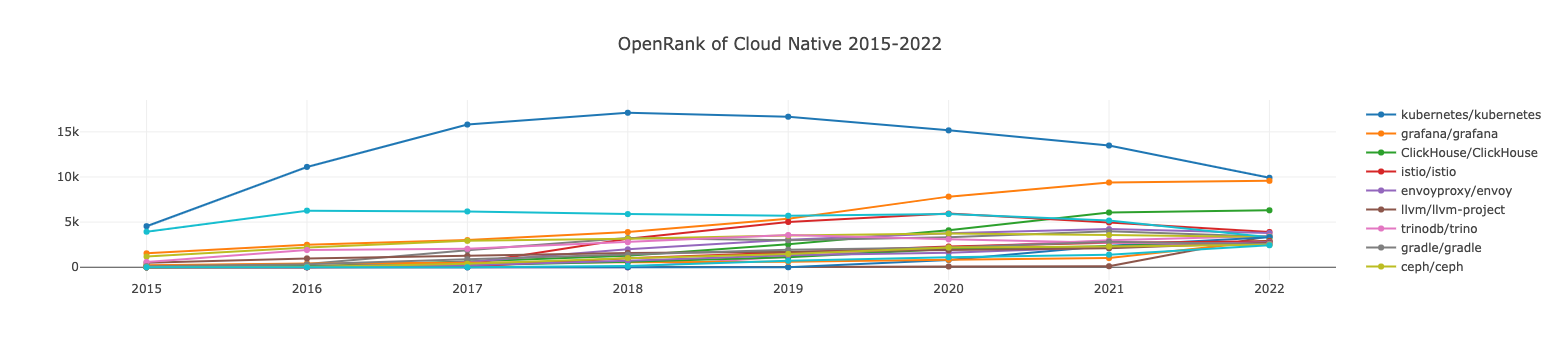

In [ ]:
processTechFieldData(':technology/cloud_native', 'Cloud Native');

### 大数据

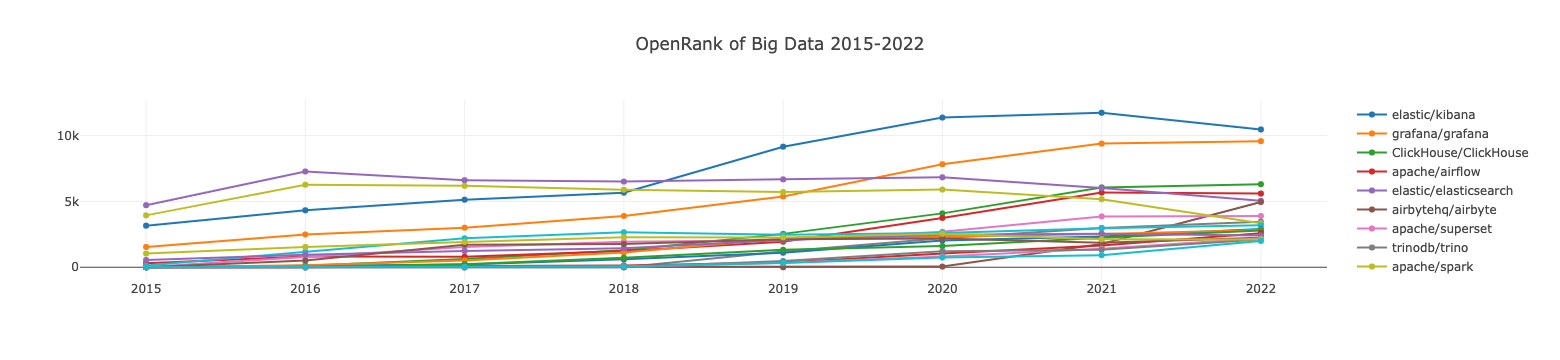

In [ ]:
processTechFieldData(':technology/big_data', 'Big Data');

### 数据库

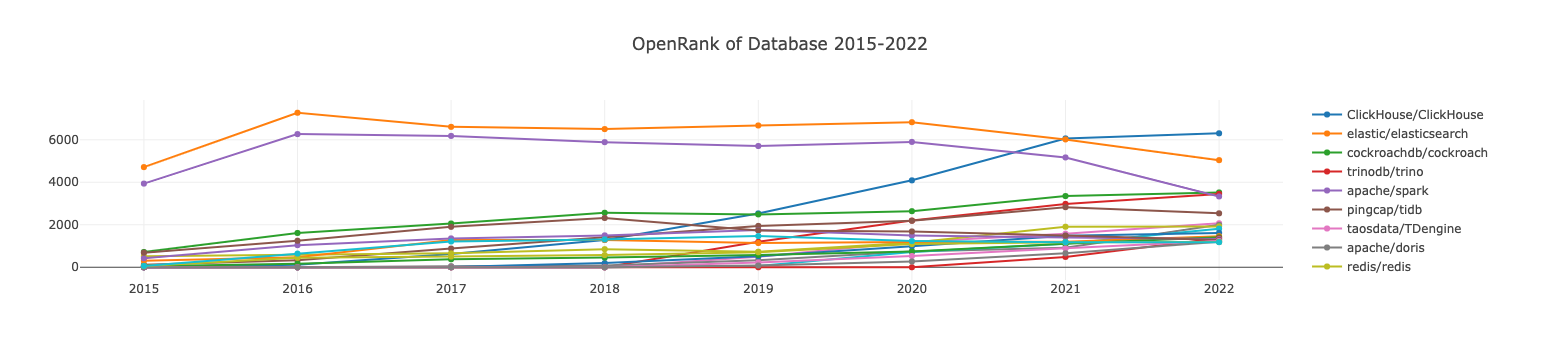

In [ ]:
processTechFieldData(':technology/database', 'Database');

### 操作系统

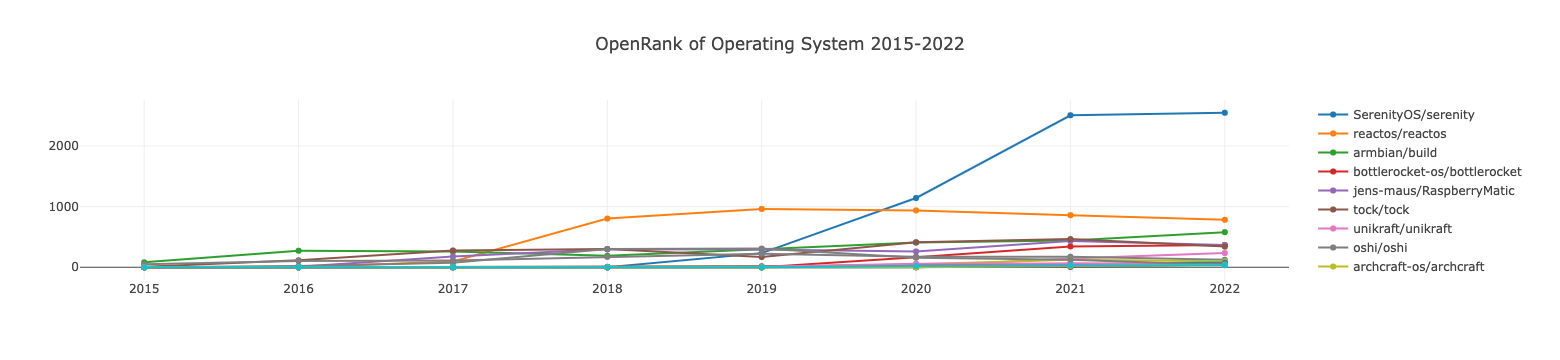

In [ ]:
processTechFieldData(':technology/operating_system', 'Operating System');

## 应用领域项目 OpenRank Top 10 数据分析

此处给出数个应用领域 2022 年度 OpenRank 指标 Top 10 项目及其自 2015 年起的 OpenRank 变化趋势。*

### 依赖包和框架

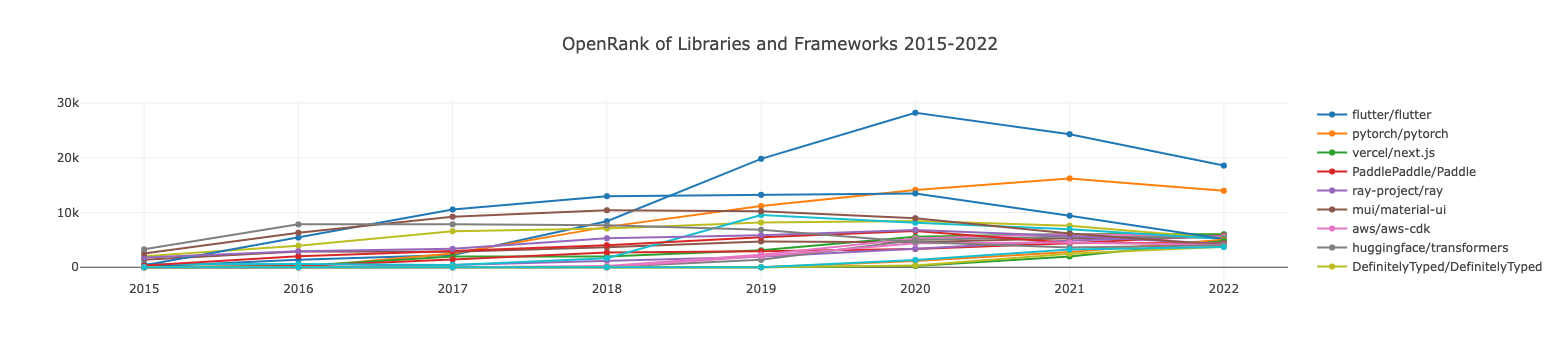

In [ ]:
processTechFieldData(':application_domain/libraries_and_frameworks', 'Libraries and Frameworks');

### 应用软件

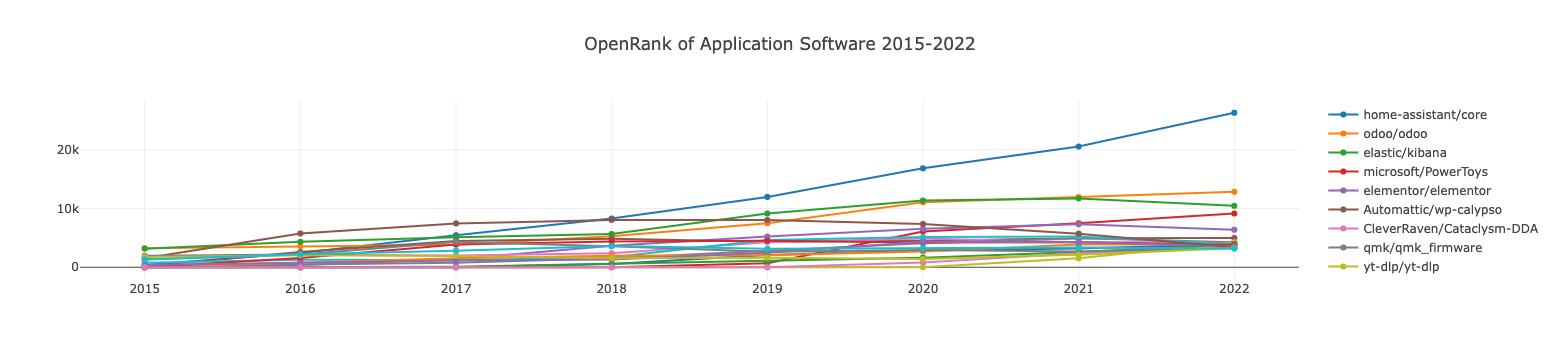

In [ ]:
processTechFieldData(':application_domain/application_software', 'Application Software');

### 系统软件

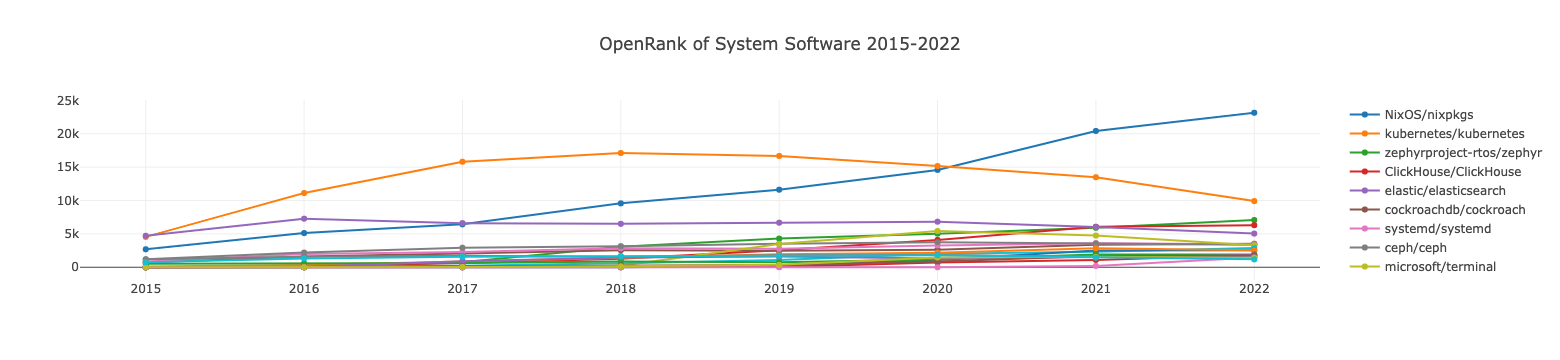

In [ ]:
processTechFieldData(':application_domain/system_software', 'System Software');

### 软件工具

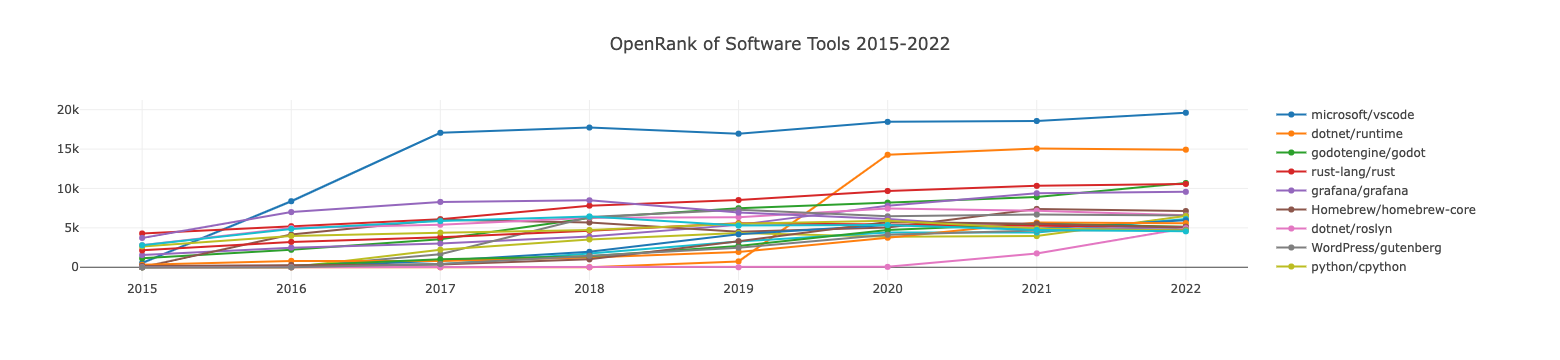

In [ ]:
processTechFieldData(':application_domain/software_tools', 'Software Tools');

### 非软件

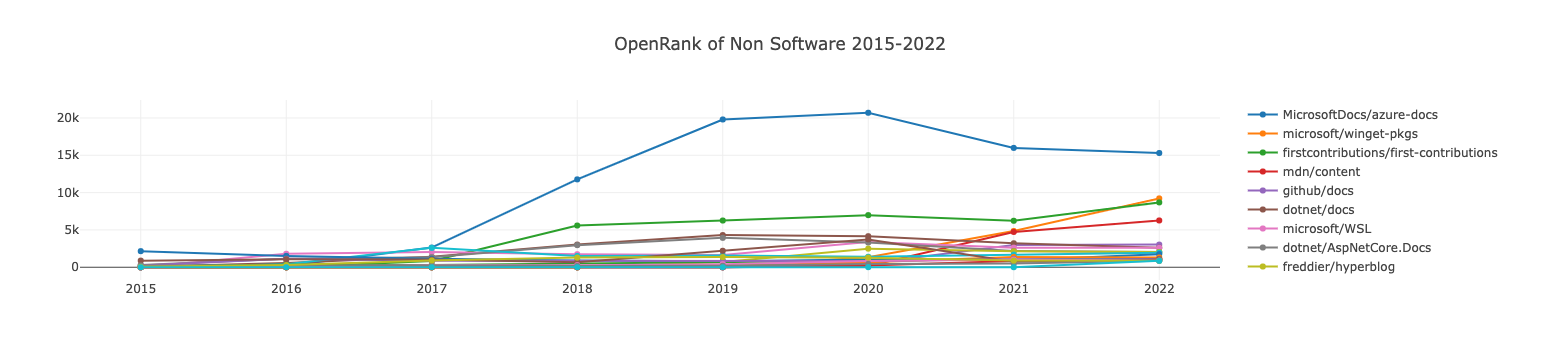

In [ ]:
processTechFieldData(':application_domain/non_software', 'Non Software');

## 开源项目时区打点分布图

此处将根据中国项目 OpenRank Top 30 在 2022 全年中的事件按事件分布情况绘制打孔图，从而可以观察项目的工作时间分布情况。

In [ ]:
openDigger.index.openrank.getRepoOpenrank({
    ...baseOptions, labelIntersect: [':regions/China'], limit: 30,
}).then(data => {
    var ids = data.map(r => r.id);
    var sql = `
SELECT repo_id, argMax(name, time) AS name, groupArray(count) AS data
FROM
(SELECT repo_id, argMax(repo_name, created_at) AS name, MAX(created_at) AS time, toDayOfWeek(created_at) AS weekday, toHour(created_at) AS hour, COUNT() AS count
FROM gh_events
WHERE toYear(created_at)=2022 AND repo_id IN (${ids.join(',')})
GROUP BY repo_id, weekday, hour
ORDER BY weekday, hour)
GROUP BY repo_id
    `;
    openDigger.driver.clickhouse.query(sql).then(data => {
        data.forEach(d => {
            const maxCount = Math.max(...d[2]);
            console.log(`项目 ${d[1]} 的工作时间分布链接为：https://oss.x-lab.info/open_digger/assets/working_hour_distribution.svg?data=${JSON.stringify(d[2].map(c => Math.ceil(parseInt(c)*10/maxCount)))}`);
        });
    });
});

项目 NervJS/taro 的工作时间分布链接为：https://oss.x-lab.info/open_digger/assets/working_hour_distribution.svg?data=[1,3,9,8,3,5,9,8,7,5,5,6,5,4,3,2,2,1,1,1,1,1,1,1,1,3,8,8,3,3,8,8,8,8,4,6,5,4,3,2,2,1,1,1,1,1,1,1,1,4,8,8,4,5,10,8,8,6,4,4,2,2,2,2,2,1,1,1,1,1,1,1,1,4,8,7,3,4,7,9,9,6,5,6,5,3,2,2,2,1,1,1,1,1,1,1,3,8,7,3,2,7,8,9,6,4,3,2,1,2,2,2,1,1,1,1,1,1,1,3,2,2,2,2,1,3,3,3,3,2,1,2,2,2,2,2,1,1,1,1,1,1,1,1,1,2,2,2,2,1,1,2,2,2,1,1,1,2,2,2,1,1,1,1,1,1]
项目 PaddlePaddle/PaddleDetection 的工作时间分布链接为：https://oss.x-lab.info/open_digger/assets/working_hour_distribution.svg?data=[1,2,4,4,2,2,3,3,3,3,2,3,2,2,1,1,1,1,1,1,1,1,1,1,1,2,3,4,2,2,7,4,4,3,2,3,2,2,1,1,1,1,1,1,1,1,1,1,1,2,4,4,2,2,10,3,3,3,2,2,3,2,1,1,1,1,1,1,1,1,1,1,1,2,4,4,2,3,4,3,4,4,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,2,4,3,2,2,3,3,3,3,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
项目 baidu/amis 的工作时间分布链接为：https://oss.x-lab.info/open_digger/assets/working_hour_distribution.svg?data=[

> * 项目与开发者标签请参考 OpenDigger 项目标签数据，有额外标签数据欢迎 Issue 提交